In [1]:
import numpy as np
import sympy as sp

sp.init_printing(use_unicode=True)

In [2]:
# Variables
dt = sp.Symbol("\Delta t")
vL, vR = sp.symbols("v_L v_R")

px, py, phi, = sp.symbols(r"p_x p_y \varphi") 
yL = sp.Symbol("y_ICRl", positive=True)
yR = sp.Symbol("y_ICRr", positive=False)
xV = sp.Symbol("x_ICRv")

In [3]:
dt, vL, vR, px, py, phi, yL, yR, xV

In [4]:
x = sp.Matrix([px, py, phi, yL, yR, xV]).transpose()
x

In [5]:
sip = sp.sin(phi)
cop = sp.cos(phi)

In [6]:
dy = yR - yL
dV = vL - vR
vx = (yR * vL - yL * vR) / dy
vy = (vR - vL) * xV / dy
wz = dV / dy

In [7]:
dpx = dt * (vx * cop - vy * sip)
dpy = dt * (vx * sip + vy * cop)
dphi = dt * wz

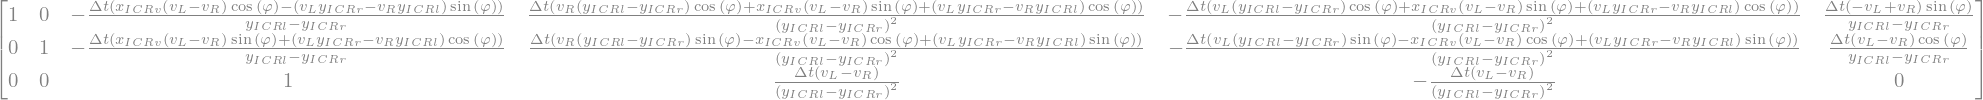

In [8]:
F = sp.Matrix([px + dpx, py + dpy, phi + dphi])
J = sp.simplify(F.jacobian([px, py, phi, yL, yR, xV]))
J

In [9]:
dyp = sp.Symbol("\Delta y")
dVp = sp.Symbol("\Delta V")
sipp = sp.Symbol(r"s_\varphi")
copp = sp.Symbol(r"c_\varphi")
vvyp = sp.Symbol("Y_V")

In [10]:
subs = {
    dy: dyp,
    dV: dVp,
    sip: sipp,
    cop: copp,
    vx*dy:vvyp
}

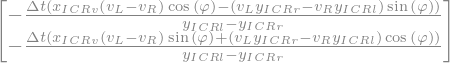

In [11]:
dXv = J[:2,-1]
dXYdphi = J[:2, 2]
dXYdphi

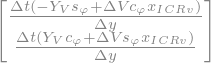

In [12]:
dXv.subs(subs)
dXYdphi.subs(subs)

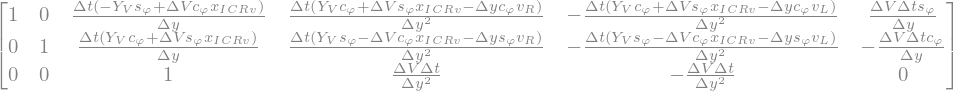

In [13]:
J.subs(subs)